In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs) 

Text(0,0.5,'Magnitud')

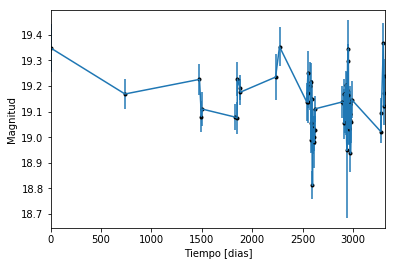

In [2]:
data = np.genfromtxt('LC_18822_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

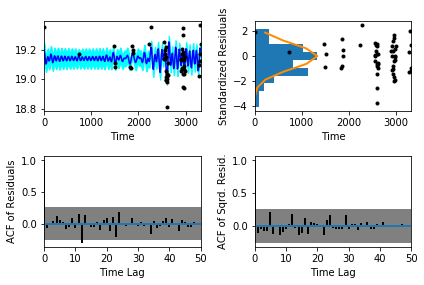

In [5]:
sample.assess_fit()

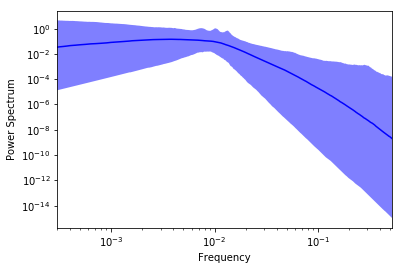

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000376389,0.473285,'Medida del nivel de ruido')

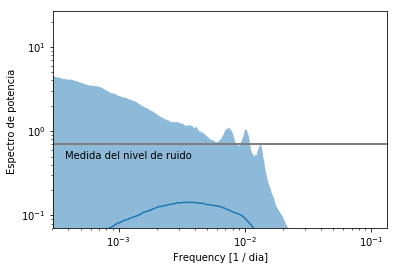

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

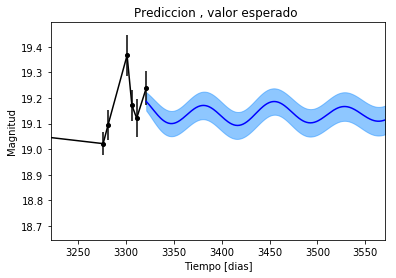

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

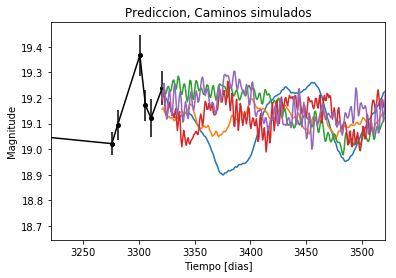

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


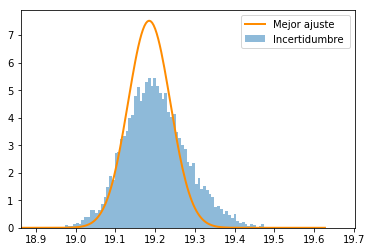

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

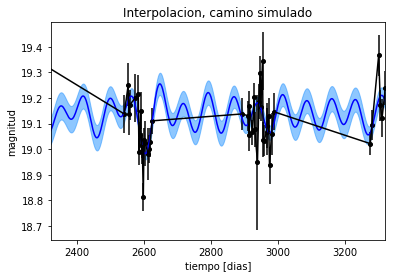

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

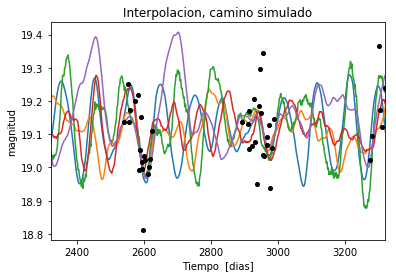

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 385.731753024
Median: 0.00822010307273
Standard deviation: 0.16963735591
68% credibility interval: [ 0.000985    0.09928134]
95% credibility interval: [  3.81458765e-04   7.18765573e-01]
99% credibility interval: [  3.24710856e-04   9.30848419e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 724.039790566
Median: 0.00478815090519
Standard deviation: 0.0807346133802
68% credibility interval: [ 0.00078957  0.03760084]
95% credibility interval: [ 0.00037329  0.21489166]
99% credibility interval: [  3.18852770e-04   6.24676888e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 444.696151555
Median: 0.00886783165118
Standard

In [16]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 470.140810309
Median: 0.0202085334694
Standard deviation: 0.252821169817
68% credibility interval: [ 0.          0.36305379]
95% credibility interval: [ 0.         0.9229504]
99% credibility interval: [ 0.          0.99635588]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 470.140810309
Median: 0.0202085334694
Standard deviation: 0.252821169817
68% credibility interval: [ 0.          0.36305379]
95% credibility interval: [ 0.         0.9229504]
99% credibility interval: [ 0.          0.99635588]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 591.247135187
Median: 0.0
Standard deviation: 0.00596265539669
68% credibi

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 637.425974688
Median: 74.1961049909
Standard deviation: 1.83920419685
68% credibility interval: [ 72.21102636  75.58808961]
95% credibility interval: [ 69.57823567  76.85312172]
99% credibility interval: [ 67.38948124  77.14970024]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 353.461616384
Median: 0.496052524219
Standard deviation: 2.0072700122
68% credibility interval: [ 0.05707324  3.26649536]
95% credibility interval: [ 0.0161725   6.80594364]
99% credibility interval: [  0.01116206  10.39362949]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 758.383386705
Median: 0.408691819066
Standard deviation: 9.26888739544
68% credibility interval: [ 0.01675928  7.8781942 ]
95% credibility interval: [  4.95458320e-

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 762.350344518
Median: 4091.68552186
Standard deviation: 2.04162756469e+96
68% credibility interval: [  2.78923106e-56   2.42857820e+64]
95% credibility interval: [  8.67638852e-100   1.15715053e+091]
99% credibility interval: [  5.32742778e-123   1.00127564e+096]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1359.04314918
Median: 19.1358958782
Standard deviation: 0.0281567409262
68% credibility interval: [ 19.11550434  19.16365686]
95% credibility interval: [ 19.0962901   19.20321837]
99% credibility interval: [ 19.07667334  19.24259152]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 470.140810309
Median: 0.0202085334694
Standard deviation: 0.252821169817
68% credibility interval: [ 0.          0.36305379]
95% credibility interval: [ 0.         0.9229504]
99% credibility interval: [ 0.          0.99635588]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 470.140810309
Median: 0.0202085334694
Standard deviation: 0.252821169817
68% credibility interval: [ 0.          0.36305379]
95% credibility interval: [ 0.         0.9229504]
99% credibility interval: [ 0.          0.99635588]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 591.247135187
Median: 0.0
Standard deviation: 0.00596265539669
68% credibi

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 637.425974688
Median: 74.1961049909
Standard deviation: 1.83920419685
68% credibility interval: [ 72.21102636  75.58808961]
95% credibility interval: [ 69.57823567  76.85312172]
99% credibility interval: [ 67.38948124  77.14970024]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1326.36657988
Median: 0.00584107621027
Standard deviation: 0.0060363893101
68% credibility interval: [ 0.00332883  0.01084725]
95% credibility interval: [ 0.00188817  0.0210045 ]
99% credibility interval: [ 0.0012386   0.03794738]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1253.64599973
Median: 1.22634146682
Standard deviation: 0.216425720031
68% credibility interval: [ 1.03861072  1.45880017]
95% credibility interval: [ 0.86250196  1.72740132]
99% credibility interval: [ 0.75037183  1.86968825]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 717.045406049
Median: 5.31257083475e-07
Standard deviation: 0.340587009313
68% credibility interval: [  4.93594907e-67   4.99944343e-03]
95% credibility interval: [  1.55216486e-94   4.33132120e-01]
99% credibility interval: [  2.25949399e-99   2.89221163e+00]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 385.731753024
Median: (-0.0516484308501-0.458297116476j)
Standard deviation: 1.91297328278
68% credibility interval: [-0.62380308-5.01989149j -0.00618895-0.07012758j]
95% credibility interval: [ -4.51613729e+00-0.1254973j   -2.39677611e-03-0.08525951j]
99% credibility interval: [ -5.84869311e+00+0.j          -2.04021848e-03-1.04482677j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 724.039790566
Median: (-0.030084839416+0j)
Standard deviation: 1.66755100861
68% credibility interval: [-0.23625302+5.23541933j -0.00496100+0.08559344j]
95% credibility interval: [-1.35020411+0.67385309j -0.00234547+0.05489673j]
99% credibility interval: [ -3.92496065e+00+6.02496668j  -2.00341104e-03+1.59852725j]
Posterior summary for para